In [145]:
import pandas as pd
import numpy as np

In [146]:
mpg = pd.read_csv("C:/Users/samsung/Downloads/mpg.csv")

In [147]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [148]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [149]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [150]:
mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


1. 제조사별 도시 연비, 고속도로 연비 평균

In [151]:
mpg_mc = mpg.groupby('manufacturer')[['cty', 'hwy']].mean().reset_index()
# mpg 데이터를 제조사별로 그룹화한 후
# 도시 연비와 고속도로 연비의 평균을 구함

In [152]:
mpg_mc

,manufacturer,cty,hwy
0,audi,17.611111,26.444444
1,chevrolet,15.000000,21.894737
2,dodge,13.135135,17.945946
3,ford,14.000000,19.360000
4,honda,24.444444,32.555556
5,hyundai,18.642857,26.857143
6,jeep,13.500000,17.625000
7,land rover,11.500000,16.500000
8,lincoln,11.333333,17.000000
9,mercury,13.250000,18.000000


- 연비 평균이 높은 제조사는?

In [153]:
mpg_mc.sort_values('cty', ascending = False)
# 도시 연비가 높은 순서대로 정렬

,manufacturer,cty,hwy
4,honda,24.444444,32.555556
14,volkswagen,20.925926,29.222222
12,subaru,19.285714,25.571429
5,hyundai,18.642857,26.857143
13,toyota,18.529412,24.911765
10,nissan,18.076923,24.615385
0,audi,17.611111,26.444444
11,pontiac,17.000000,26.400000
1,chevrolet,15.000000,21.894737
3,ford,14.000000,19.360000


In [154]:
mpg_mc.sort_values('hwy', ascending = False)
# 고속도로 연비가 높은 순서대로 정렬

,manufacturer,cty,hwy
4,honda,24.444444,32.555556
14,volkswagen,20.925926,29.222222
5,hyundai,18.642857,26.857143
0,audi,17.611111,26.444444
11,pontiac,17.000000,26.400000
12,subaru,19.285714,25.571429
13,toyota,18.529412,24.911765
10,nissan,18.076923,24.615385
1,chevrolet,15.000000,21.894737
3,ford,14.000000,19.360000


- 연비 평균이 전체 평균보다 높거나 낮은 제조사는?

In [155]:
mpg_mc['cty_mean'] = np.where(mpg_mc['cty'] < mpg['cty'].mean(), 0, 1)
mpg_mc['hwy_mean'] = np.where(mpg_mc['hwy'] < mpg['hwy'].mean(), 0, 1)
# 제조사별 도시 연비와 고속도로 연비의 평균이 전체 평균보다 작은 경우 0, 같거나 큰 경우 1로 분류해 그룹 생성

In [156]:
mpg_mc

,manufacturer,cty,hwy,cty_mean,hwy_mean
0,audi,17.611111,26.444444,1,1
1,chevrolet,15.000000,21.894737,0,0
2,dodge,13.135135,17.945946,0,0
3,ford,14.000000,19.360000,0,0
4,honda,24.444444,32.555556,1,1
5,hyundai,18.642857,26.857143,1,1
6,jeep,13.500000,17.625000,0,0
7,land rover,11.500000,16.500000,0,0
8,lincoln,11.333333,17.000000,0,0
9,mercury,13.250000,18.000000,0,0


In [157]:
# honda, volkswagen, hyundai가 도시 연비와 고속도로 연비 모두 높은 것으로 나타남
# 전체 연비 평균보다 높은 제조사가 8개, 낮은 제조사가 7개로 정규분포를 따르고 있음을 확인
# 도시 연비가 전체 평균보다 높은 경우, 고속도로 연비도 모두 전체 평균보다 높음을 확인 (그 반대도 동일)

2. 도시 연비와 고속도로 연비의 상관성 

In [158]:
mpg[['cty', 'hwy']].corr()
# 도시 연비와 고속도로 연비의 상관성이 매우 높음을 확인

,cty,hwy
cty,1.000000,0.955916
hwy,0.955916,1.000000


In [159]:
mpg['cty_hwy'] = mpg['cty'] + mpg['hwy']
# 도시 연비와 고속도로 연비를 합한 새로운 컬럼 생성
# 이후 해당 컬럼으로 연비 평가

In [160]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44


3. 배기량과 실린더 수의 상관성

In [161]:
mpg[['displ', 'cyl']].corr()
# 상관성 높음
# 실제로 배기량은 실린더 부피에 기통 수를 곱한 값임

,displ,cyl
displ,1.000000,0.930227
cyl,0.930227,1.000000


In [162]:
mpg.groupby('cyl')['displ'].mean()
# 실린더 수가 4-5개일 때 배기량 평균의 차이는 크지 않음
# 실린더 4-5개, 6개, 8개로 그룹화할 수 있으며, 실린더 수가 많을수록 배기량도 많아지는 경향이 있음

cyl
4    2.145679
5    2.500000
6    3.408861
8    5.132857
Name: displ, dtype: float64

In [163]:
mpg['cyl_dp'] = list(map(lambda x : 0 if x == 4  else 0 if x == 5 else 1 if x == 6 else 2, mpg['cyl']))
# 실린더 수가 4개 또는 5개인 경우 0, 6개인 경우 1, 8개인 경우 2로 인코딩
# 실린더 수와 배기량을 기준으로 그룹화한 새로운 컬럼 생성

In [164]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy,cyl_dp
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47,0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50,0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42,1
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44,1


4. 연비에 영향을 미치는 변수

- 배기량과 실린더 수에 따른 연비는? ('cyl_dp' 컬럼 사용)

In [165]:
mpg.groupby('cyl_dp')['cty_hwy'].mean()
# cyl_dp 컬럼을 기준으로 그룹화한 후 연비 평균 확인

cyl_dp
0    49.788235
1    39.037975
2    30.200000
Name: cty_hwy, dtype: float64

In [166]:
# 실린더 수가 많고 배기량이 많을수록 연비는 떨어짐

- 제조 연도에 따른 연비는?

In [167]:
mpg['year'].value_counts()
# 제조 연도 확인

1999    117
2008    117
Name: year, dtype: int64

In [168]:
mpg.groupby('year')['cty_hwy'].mean()
# 제조 연도별 연비 평균에 차이 없음

year
1999    40.444444
2008    40.153846
Name: cty_hwy, dtype: float64

In [169]:
# 제조 연도는 연비에 영향을 미치는 유의미한 변수가 아님

- 변속기에 따른 연비는?

In [170]:
mpg['trans'].value_counts()
# 변속기 종류 확인

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [171]:
mpg.groupby('trans')['cty_hwy'].mean()
# 변속기 종류별 연비 확인
# manual은 평균의 차이가 크지 않으나, auto는 최솟값이 33이고 최댓값이 48로 차이가 나는 편

trans
auto(av)      47.800000
auto(l3)      48.000000
auto(l4)      37.903614
auto(l5)      35.435897
auto(l6)      33.666667
auto(s4)      44.333333
auto(s5)      42.666667
auto(s6)      42.562500
manual(m5)    45.551724
manual(m6)    41.105263
Name: cty_hwy, dtype: float64

In [172]:
# auto와 manual로 구분해 연비를 확인하는 것은 유의미하지 않음

- 구동방식에 따른 연비는?

In [173]:
mpg['drv'].value_counts()
# 구동방식 종류 확인

f    106
4    103
r     25
Name: drv, dtype: int64

In [174]:
mpg.groupby('drv')['cty_hwy'].describe()
# 요약통계량 확인

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
4,103.0,33.504854,6.832554,21.0,30.0,32.0,39.0,48.0
f,106.0,48.132075,7.723897,28.0,44.0,47.0,51.0,79.0
r,25.0,35.080000,5.794538,26.0,30.0,36.0,40.0,44.0


<AxesSubplot:>

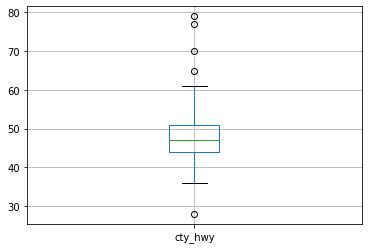

In [175]:
mpg_drv = mpg.loc[mpg['drv'] == 'f', 'cty_hwy']
mpg_drv.to_frame().boxplot()
# 표준편차가 가장 큰 f의 그래프 확인
# 평균에 집중되어 있음

In [176]:
mpg.groupby('drv')['cty_hwy'].mean()
# 구동방식에 따른 연비 평균

drv
4    33.504854
f    48.132075
r    35.080000
Name: cty_hwy, dtype: float64

In [177]:
mpg['cty_hwy'].mean()

40.2991452991453

In [178]:
# 구동방식이 4, r인 경우는 전체 연비 평균보다 낮고, f인 경우는 전체 연비 평균보다 높음

- 연료 종류에 따른 연비는?

In [179]:
mpg['fl'].value_counts()
# 연료 종류 확인

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [180]:
mpg.groupby('fl')['cty_hwy'].describe()
# 요약 통계량 확인

,count,mean,std,min,25%,50%,75%,max
fl,,,,,,,,
c,1.0,60.000000,NaN,60.0,60.0,60.0,60.00,60.0
d,5.0,59.200000,22.521101,31.0,39.0,70.0,77.00,79.0
e,8.0,23.000000,2.878492,21.0,21.0,21.0,25.25,28.0
p,52.0,42.596154,6.774403,25.0,40.0,43.5,47.00,52.0
r,168.0,39.732143,9.301003,26.0,31.0,39.0,46.25,65.0


<AxesSubplot:>

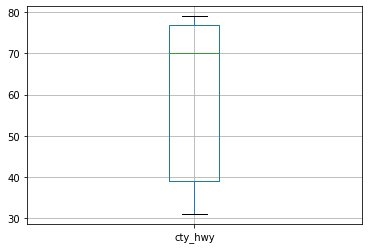

In [181]:
mpg_fl = mpg.loc[mpg['fl'] == 'd', 'cty_hwy']
mpg_fl.to_frame().boxplot()
# 표준편차가 가장 큰 d 그래프 확인
# 평균에 집중되어 있지 않음

In [182]:
# 연료가 c인 경우 연비가 60으로 가장 높고, e인 경우 23으로 가장 작음
# 연료 d의 경우는 표준편차가 크고, 평균과 중위값의 차이가 큼
# 연료별 자동차 수가 상대적으로 많은 p와 r은 표준편차가 작으므로, 연료가 p와 r인 경우 연비의 평균을 확인할 수 있음

- 자동차 종류에 따른 연비는? (자동차 모델 대신 사용)

In [183]:
mpg['class'].value_counts()
# 자동차 종류 확인

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [184]:
mpg.groupby('class')['cty_hwy'].mean().sort_values(ascending = False)
# 자동차 종류 별 연비 평균 확인

class
subcompact    48.514286
compact       48.425532
midsize       46.048780
2seater       40.200000
minivan       38.181818
suv           31.629032
pickup        29.878788
Name: cty_hwy, dtype: float64

In [185]:
# 자동차 크기가 클수록 연비가 낮아지는 경향이 있음

5. 연비에 영향을 미치는 유의미한 변수들로 구성된 데이터 프레임

In [186]:
mpg_2 = mpg[['manufacturer', 'cyl_dp', 'drv', 'fl', 'class', 'cty_hwy']]